#### Objective: Develop machine learning models that can predict whether a employee seek treatment or not. 
#### Database: This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

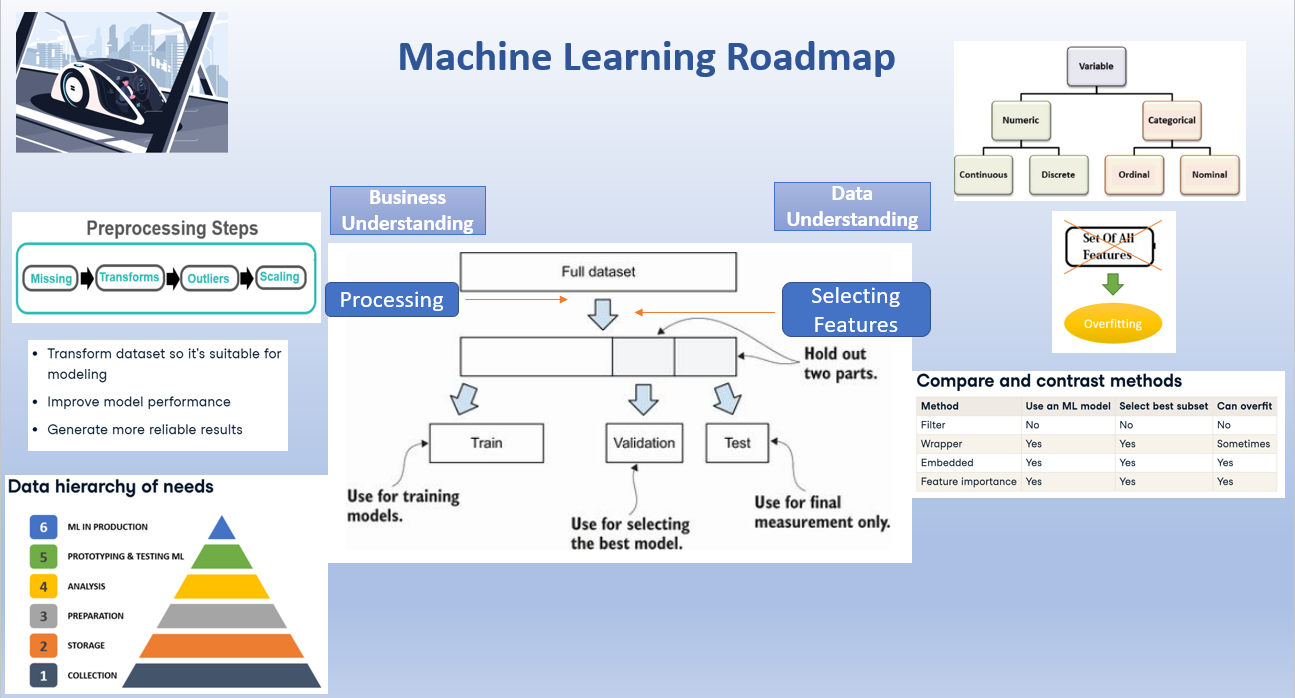

Content This dataset contains the following data:

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter('ignore')

In [23]:
import os
os.chdir(r'H:\Python Committee\Python Machine Learning Presentation\mental health survey')   

In [24]:
df = pd.read_csv(r'H:\Python Committee\Python Machine Learning Presentation\mental health survey\survey.csv')

In [25]:
df.sample(3).style.applymap(lambda x : "background-color: #90EE90")

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
496,2014-08-27 16:27:47,36,m,United States,TX,No,No,Yes,Sometimes,More than 1000,No,No,Yes,Not sure,No,No,Don't know,Somewhat difficult,Yes,Maybe,Some of them,No,No,No,No,Yes,Stigma is the worst. People first language is a small step but we can't get that right.
1061,2014-08-29 11:56:18,27,Male,United States,CA,No,No,Yes,Sometimes,100-500,No,Yes,Don't know,Not sure,No,No,Yes,Very difficult,Maybe,No,Some of them,No,No,Maybe,No,No,nan
1134,2014-08-31 22:16:40,27,M,New Zealand,nan,No,No,No,Rarely,26-100,No,Yes,No,Yes,No,Yes,No,Somewhat difficult,Yes,No,No,No,No,Maybe,No,Yes,nan


In [26]:
print("total row number: ", df.shape[0], "total column number: ", df.shape[1])

total row number:  1259 total column number:  27


In [27]:
# List all varibles in the dataset and determine the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [28]:
# Check missing data
# Convert all columns to lowercase
df.columns = df.columns.str.lower()
# check percentage of missing
round((df.isna().sum()/df.shape[0])*100,2).sort_values(ascending=False)

comments                     86.97
state                        40.91
work_interfere               20.97
self_employed                 1.43
benefits                      0.00
age                           0.00
gender                        0.00
country                       0.00
family_history                0.00
treatment                     0.00
no_employees                  0.00
remote_work                   0.00
tech_company                  0.00
care_options                  0.00
obs_consequence               0.00
wellness_program              0.00
seek_help                     0.00
anonymity                     0.00
leave                         0.00
mental_health_consequence     0.00
phys_health_consequence       0.00
coworkers                     0.00
supervisor                    0.00
mental_health_interview       0.00
phys_health_interview         0.00
mental_vs_physical            0.00
timestamp                     0.00
dtype: float64

In [29]:
df['country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Sweden                      7
Poland                      7
Italy                       7
Belgium                     6
South Africa                6
Brazil                      6
Israel                      5
Bulgaria                    4
Singapore                   4
Russia                      3
Austria                     3
Finland                     3
Mexico                      3
Colombia                    2
Portugal                    2
Greece                      2
Denmark                     2
Croatia                     2
Bosnia and Herzegovina      1
Latvia                      1
Philippines                 1
Zimbabwe                    1
Costa Rica

In [30]:
df['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

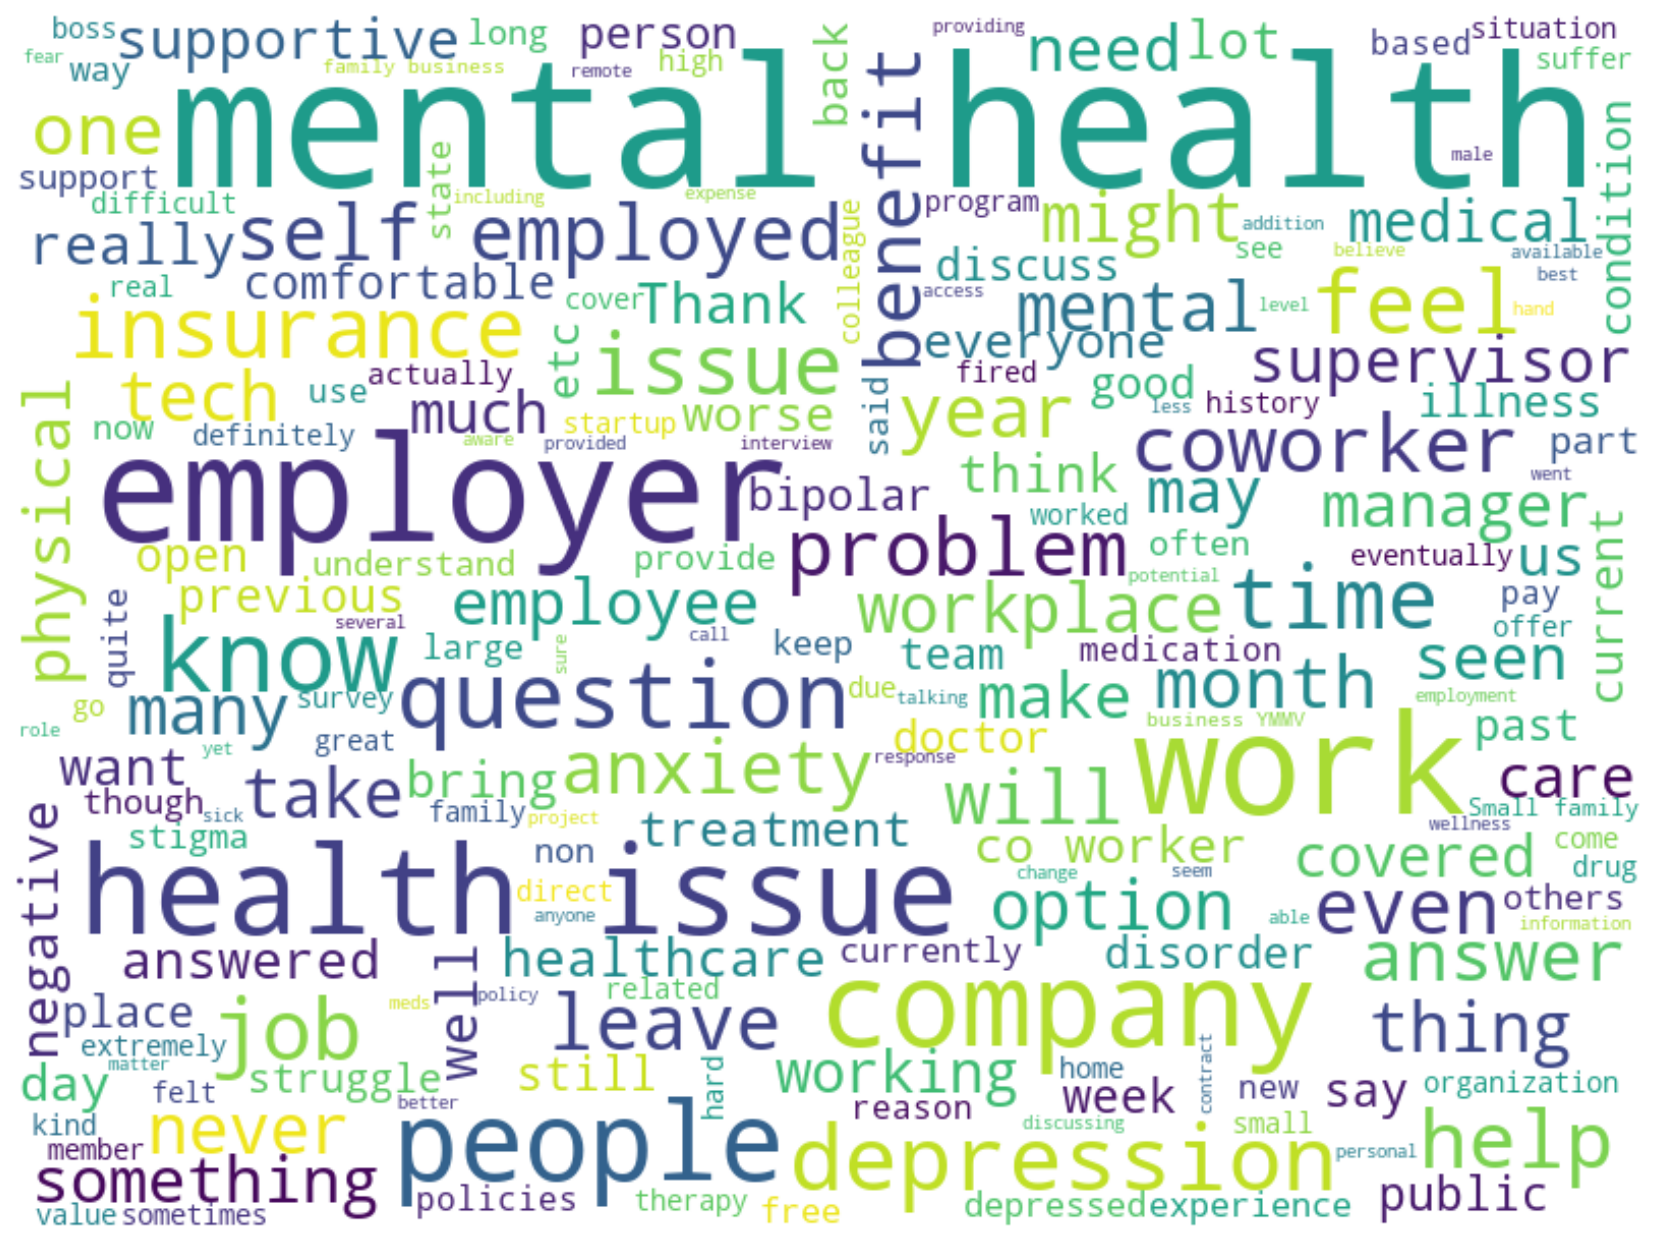

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

words = ''.join(df['comments'].dropna())


plt.figure(figsize=(14,14), dpi=150)

wordcloud = WordCloud(max_words=200,
                       stopwords = STOPWORDS,
                       background_color = "white",
                       mask = np.array(Image.open(r"H:\Python Committee\Python Machine Learning Presentation\mental health survey\humanhead.png")),
                       contour_color='#023075',
                       contour_width=1,
                       width=1500, height=800).generate(words)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

In [32]:
df = df.drop(['country','state','timestamp','comments'], axis = 1)

In [33]:
df['gender'].value_counts().reset_index()

,index,gender
0,Male,615
1,male,206
2,Female,121
3,M,116
4,female,62
5,F,38
6,m,34
7,f,15
8,Make,4
9,Male,3


Re-group the gender value:  
(1). (Male, or cis Male) = 'Male'; (2). (Female, or cis Female) = 'Female'; (3). Else: 'Other'

In [34]:
def standardize_gender(df):
    gender_list = df['gender'].tolist()
    standardized_list = []
    
    for gender in gender_list:
        if gender in ['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                      'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make']:
            standardized_list.append('Male')
        elif gender in ['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                        'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                        'woman']:
            standardized_list.append('Female')
        else:
            standardized_list.append('Other')
    
    df['gender'] = standardized_list
    
    return df

In [35]:
my_modified_df = standardize_gender(df)

In [36]:
df['gender'].value_counts().reset_index().style.applymap(lambda x : "background-color: #90EE90")

,index,gender
0,Male,991
1,Female,247
2,Other,21


In [37]:
df['age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          

In [38]:
# Correct the outliers
# Let us treat age
df.loc[df.age<12,'age']=15
df.loc[df.age>75,'age']=75

<AxesSubplot:>

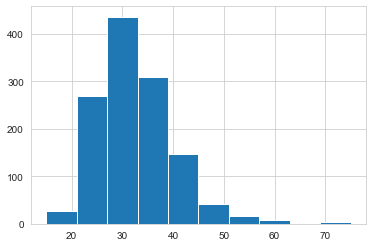

In [39]:
df['age'].hist()

In [40]:
df.isna().sum()

age                            0
gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [41]:
self_employed = pd.DataFrame(df['self_employed'].value_counts())
self_employed.style.applymap(lambda x : "background-color: #90EE90")

,self_employed
No,1095
Yes,146


In [42]:
work_interfere = pd.DataFrame(df['work_interfere'].value_counts())
work_interfere.style.applymap(lambda x : "background-color: #90EE90")

,work_interfere
Sometimes,465
Never,213
Rarely,173
Often,144


In [43]:
#replacing NaN values because they are so few
df['self_employed'] = df['self_employed'].fillna('Don\'t know')
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )

In [44]:
# Calculate the number of missing values in each column
df.isna().sum()

age                          0
gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [45]:
df.sample(7).style.applymap(lambda x : "background-color: #ADD8E6")

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
429,24,Female,No,No,No,Don't know,More than 1000,No,Yes,Yes,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Some of them,Some of them,Yes,Yes,Yes,No
7,39,Male,Don't know,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No
506,42,Male,No,No,No,Never,100-500,No,No,Yes,No,Yes,No,Don't know,Very difficult,Maybe,No,Yes,Yes,Maybe,Yes,No,No
593,41,Male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Not sure,Yes,Yes,Don't know,Don't know,Maybe,No,Some of them,Some of them,No,No,No,No
401,28,Male,No,Yes,Yes,Sometimes,26-100,No,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,Maybe,No,No
696,37,Male,No,No,No,Don't know,100-500,No,Yes,No,No,No,No,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,Maybe,No,No
740,37,Male,No,Yes,Yes,Sometimes,26-100,No,Yes,No,Yes,No,No,Yes,Very easy,No,No,Some of them,Yes,No,Maybe,Yes,Yes


In [48]:
# Univariate visualization of categorical variables

df_ = df.drop(['age'], axis=1)

buttons = []
i = 0
vis = [False] * 24

for col in df_.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 24

fig = go.Figure()

for col in df_.columns:
    fig.add_trace(go.Pie(
             values = df_[col].value_counts(),
             labels = df_[col].value_counts().index,
             title = dict(text = 'Distribution of {}'.format(col),
                          font = dict(size=12, family = 'Arial'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',))

fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('dark').as_hex(),
                              line=dict(color='#008080', width=1)))


fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 1.15,
                        y = 0.85,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                             showarrow=False,
                             x = 1.06, y = 0.92, yref = "paper", align = "left")])

for i in range(1,22):
    fig.data[i].visible = False

fig.show()

In [49]:
male   = df[df.gender == 'Male'].drop(['gender', 'age'], axis=1)
female = df[df.gender == 'Female'].drop(['gender', 'age'], axis=1)
other  = df[df.gender == 'Other'].drop(['gender', 'age'], axis=1)

In [50]:
buttons = []
i = 0
vis = [False] * 21

for col in male.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 21

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

for col in male.columns:
    fig.add_trace(go.Pie(
             values = male[col].value_counts(),
             labels = male[col].value_counts().index,
             title = dict(text = 'Male distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,1)
    
for col in female.columns:
    fig.add_trace(go.Pie(
             values = female[col].value_counts(),
             labels = female[col].value_counts().index,
             title = dict(text = 'Female distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,2)
    
   

fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('bright').as_hex(),
                              line=dict(color='#000000', width=1)))

fig.update_traces(row=1, col=2, hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('dark').as_hex(),
                              line=dict(color='#000000', width=1)))


fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  font_family   = 'monospace',
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 0.62,
                        y = 0.91,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                                  font = dict(size = 14),
                             showarrow=False,
                             x = 0.5, y = 1, yref = "paper", align = "left")])

for i in range(1,42):
    fig.data[i].visible = False
fig.data[21].visible = True

fig.show()

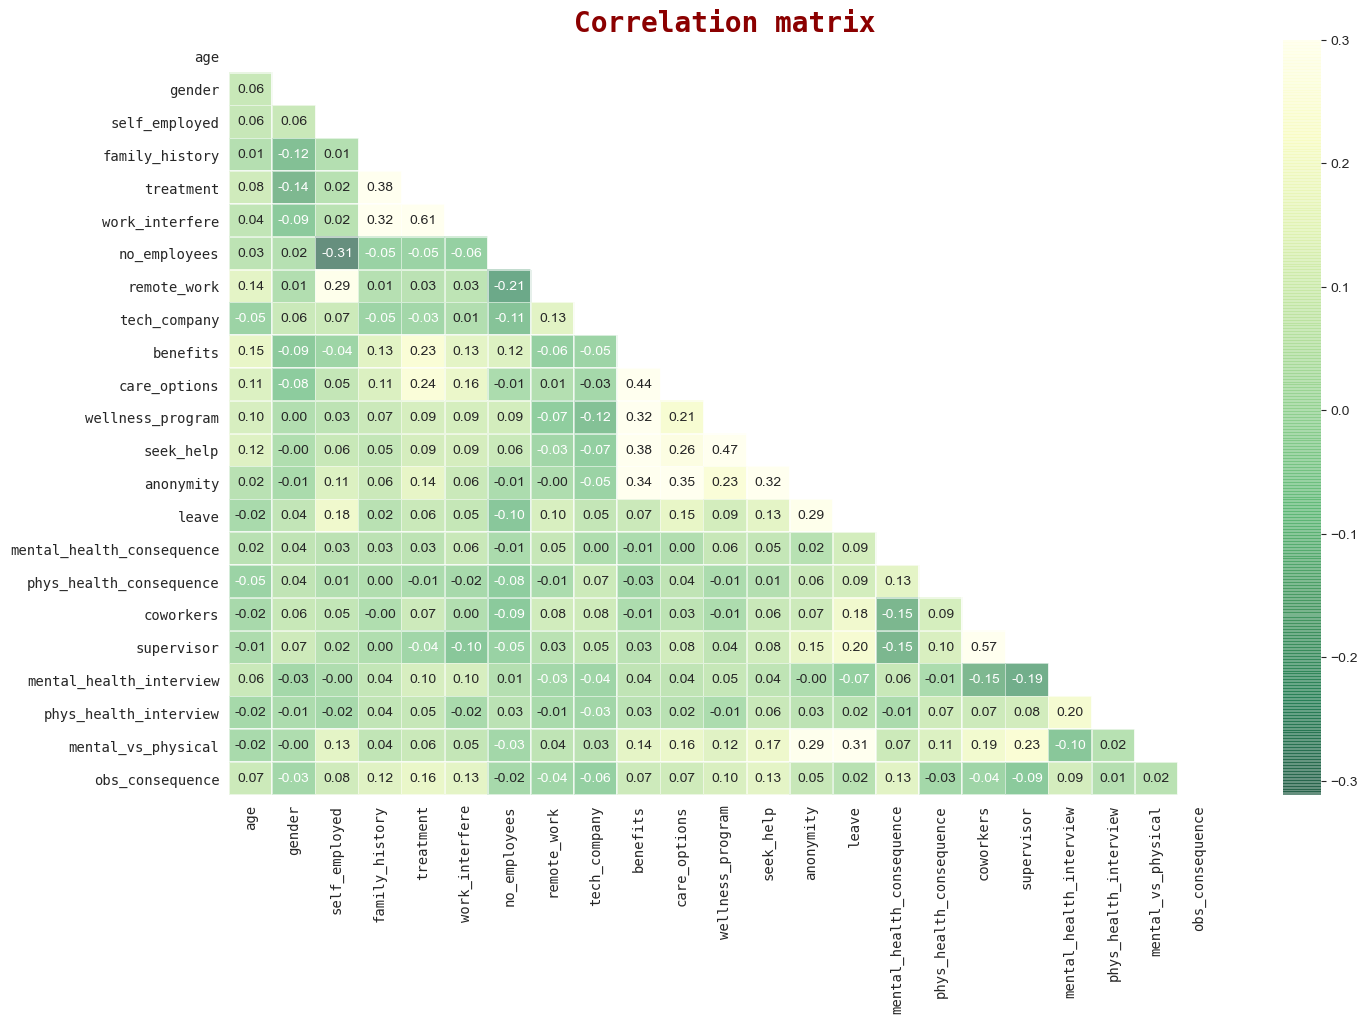

In [51]:
df1 = df.copy()

from sklearn.preprocessing import LabelEncoder
cols = df1.columns

encoder = LabelEncoder()
for col in cols:
    encoder.fit(df1[col])
    df1[col] = encoder.transform(df1[col])

plt.figure(figsize = (16, 10), dpi = 100)

corr = df1.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            mask = mask,
            cmap = 'YlGn_r',
            vmax=.3,
            annot = True,
            linewidths = 0.5,
            fmt = ".2f",
            alpha = 0.6)

hfont = {'fontname':'monospace'}
plt.xticks(**hfont)
plt.yticks(**hfont)

plt.title('Correlation matrix',
          family = 'monospace',
          fontsize = 20,
          weight = 'semibold',
          color = '#8B0000')

plt.show()

In [52]:
df1.sample(3).style.applymap(lambda x : "background-color: #ADD8E6")

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
232,21,1,1,0,1,4,5,0,0,0,1,0,0,0,3,2,1,0,0,1,0,1,0
419,37,1,1,1,1,4,0,1,1,1,2,1,0,0,0,2,0,0,0,1,1,1,1
213,15,0,1,1,1,4,4,0,1,0,0,1,1,1,0,2,0,1,1,1,0,1,1
